In [ ]:
!pip install dsp-utils

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 52.1 MB/s eta 0:00:00


In [ ]:
from matplotlib import pyplot as plt
import numpy as np
from ipywidgets import interact
from scipy.fftpack import rfft, rfftfreq

from dsp_utils.filters import frequency as flt
from dsp_utils.signals import SignalGenerator
from dsp_utils.signals import Visualizer

In [ ]:
def filter_(signal, f0, f1, sample_rate):
    f = flt.GenericButterBandPass(f0, f1, fs=sample_rate, N=2)
    signal_filtered = f(signal)
    return signal_filtered

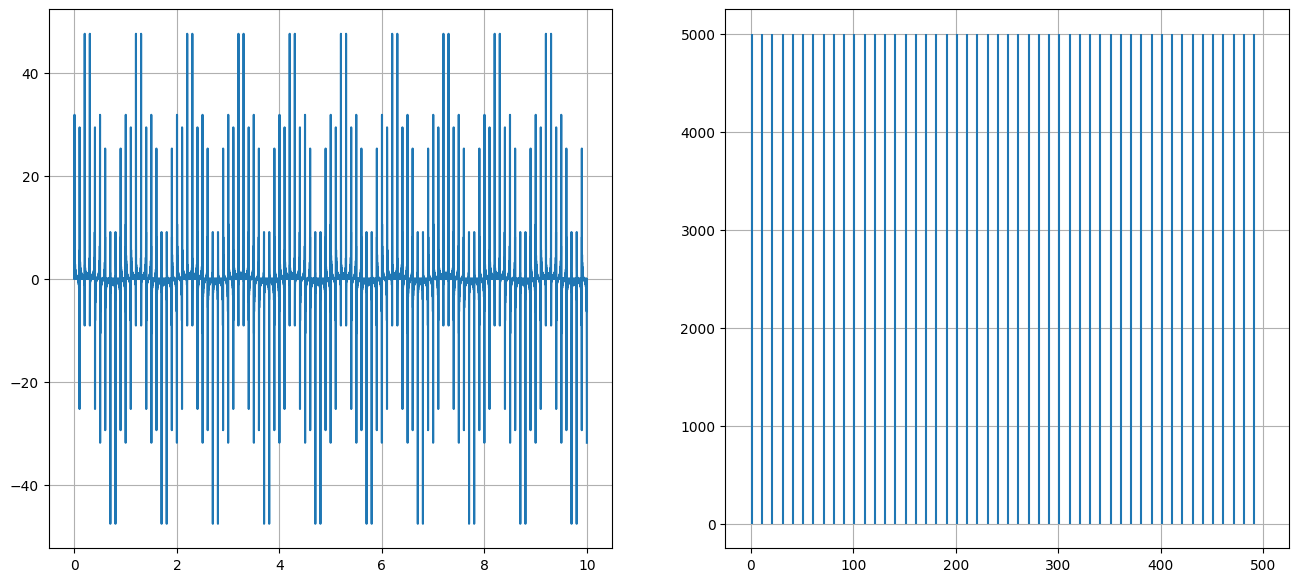

In [ ]:
vis = Visualizer(figsize=(16, 7), dpi=100)

f = np.arange(1, 500, 10)

generador = SignalGenerator(frequency=f, amplitude=1, duration=10, sampling_rate=1000)
signal = np.sum(generador.sine_wave, axis=0)

vis.plot_dsp(signal, sample_rate=1000, time=generador.time, ffn='vlines')

In [ ]:
@interact(fc=(0, 500, 10), wb=(10, 250, 10), gain=(-10, 10, 1))
def equalizer(fc=100, wb=10, gain=0):
    f0 = fc-wb
    f1 = fc+wb
    sample_rate = generador.sampling_rate

    if f0<=0:
        f0 = 0.1
    if f1>=sample_rate/2:
        f1 = sample_rate/2 - 0.1

    signal_filtered = filter_(signal, f0, f1, sample_rate)

    signal_equalized = (signal - signal_filtered) + (signal_filtered*np.power(10, (gain / 20)))

    vis.plot_dsp(signal_equalized, sample_rate=1000, time=generador.time, ffn='vlines')
    plt.show()

interactive(children=(IntSlider(value=100, description='fc', max=500, step=10), IntSlider(value=10, descriptio…

In [ ]:
from dsp_utils.filters import frequency as flt
from dsp_utils.signals import SignalGenerator
from dsp_utils.signals import Visualizer
import numpy as np
from matplotlib import pyplot as plt
from ipywidgets import interact, FloatSlider

# Función para aplicar el filtro pasa banda
def filter_(signal, f0, f1, sample_rate):
    f = flt.GenericButterBandPass(f0, f1, fs=sample_rate, N=2)
    return f(signal)

# Configuración del visualizador y generación de señal base
vis = Visualizer(figsize=(16, 7), dpi=100)
f = np.arange(1, 500, 10)
generador = SignalGenerator(frequency=f, amplitude=1, duration=10, sampling_rate=1000)
signal = np.sum(generador.sine_wave, axis=0)
vis.plot_dsp(signal, sample_rate=1000, time=generador.time, ffn='vlines')

# Función interactiva para el ecualizador de 5 bandas
@interact(
    gain1=FloatSlider(min=-10, max=10, step=1, value=0, description='Gain 1 (dB)'),
    gain2=FloatSlider(min=-10, max=10, step=1, value=0, description='Gain 2 (dB)'),
    gain3=FloatSlider(min=-10, max=10, step=1, value=0, description='Gain 3 (dB)'),
    gain4=FloatSlider(min=-10, max=10, step=1, value=0, description='Gain 4 (dB)'),
    gain5=FloatSlider(min=-10, max=10, step=1, value=0, description='Gain 5 (dB)')
)
def five_band_equalizer(gain1, gain2, gain3, gain4, gain5):
    sample_rate = generador.sampling_rate
    signal_equalized = np.zeros_like(signal)

    # Definición de frecuencias centrales y anchos de banda para las 5 bandas
    fc_list = [100, 200, 300, 400, 500]  # Frecuencias centrales
    wb_list = [20, 20, 20, 20, 20]       # Ancho de banda (Hz)
    gain_list = [gain1, gain2, gain3, gain4, gain5]

    for fc, wb, gain in zip(fc_list, wb_list, gain_list):
        f0 = max(fc - wb, 0.1)  # Evitar valores negativos
        f1 = min(fc + wb, sample_rate / 2 - 0.1)  # Evitar exceder Nyquist
        signal_filtered = filter_(signal, f0, f1, sample_rate)
        gain_factor = np.power(10, gain / 20)  # Convertir dB a factor de amplitud
        signal_equalized += signal_filtered * gain_factor

    # Agregar la señal residual fuera de las bandas
    residual_signal = signal - np.sum([filter_(signal, max(fc - wb, 0.1), min(fc + wb, sample_rate / 2 - 0.1), sample_rate)
                                       for fc, wb in zip(fc_list, wb_list)], axis=0)
    signal_equalized += residual_signal

    vis.plot_dsp(signal_equalized, sample_rate=1000, time=generador.time, ffn='vlines')
    plt.show()


interactive(children=(FloatSlider(value=0.0, description='Gain 1 (dB)', max=10.0, min=-10.0, step=1.0), FloatS…